In [1]:
import pandas as pd
import numpy as np

In [2]:
dfSanJose = pd.read_csv("/content/PreprocessedDataset")

In [43]:
dfSanJose

,Unnamed: 0,Temp,MaxTemp,MinTemp,hPAAtSeaLevel,hPA,Humidity,Visibility,AverageWindSpeed,MaxSustainedWindSpeed,Fog,Percipitation
0,0,48.02,55.94,37.04,1021.0,1019.3,29,16.1,13.7,25.9,0,0
1,1,43.52,57.02,33.08,1023.9,1022.2,43,16.1,6.3,11.1,0,0
2,2,44.78,57.92,33.08,1023.7,1022.0,54,16.1,5.0,14.8,0,0
3,3,46.22,62.06,33.98,1017.6,1015.9,62,16.1,3.3,16.5,0,0
4,4,51.26,62.06,35.06,1008.9,1007.2,72,15.8,20.9,44.6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1821,49.46,51.80,43.70,1008.8,941.1,87,10.1,11.7,22.2,0,1
1985,1822,52.34,57.20,46.40,1012.8,945.0,78,12.4,14.6,22.2,0,1
1986,1823,48.20,50.36,45.68,1011.6,943.1,95,6.9,8.5,16.5,0,1
1987,1824,52.70,57.20,47.84,1001.6,935.1,91,10.3,17.8,29.4,0,1


In [44]:
pred = dfSanJose['Percipitation']

In [45]:
pred.values

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
data = dfSanJose.drop(['Percipitation'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)

In [47]:
data

,Temp,MaxTemp,MinTemp,hPAAtSeaLevel,hPA,Humidity,Visibility,AverageWindSpeed,MaxSustainedWindSpeed,Fog
0,48.02,55.94,37.04,1021.0,1019.3,29,16.1,13.7,25.9,0
1,43.52,57.02,33.08,1023.9,1022.2,43,16.1,6.3,11.1,0
2,44.78,57.92,33.08,1023.7,1022.0,54,16.1,5.0,14.8,0
3,46.22,62.06,33.98,1017.6,1015.9,62,16.1,3.3,16.5,0
4,51.26,62.06,35.06,1008.9,1007.2,72,15.8,20.9,44.6,0
...,...,...,...,...,...,...,...,...,...,...
1984,49.46,51.80,43.70,1008.8,941.1,87,10.1,11.7,22.2,0
1985,52.34,57.20,46.40,1012.8,945.0,78,12.4,14.6,22.2,0
1986,48.20,50.36,45.68,1011.6,943.1,95,6.9,8.5,16.5,0
1987,52.70,57.20,47.84,1001.6,935.1,91,10.3,17.8,29.4,0


In [48]:
data = data.values

In [49]:
data[0]

array([  48.02,   55.94,   37.04, 1021.  , 1019.3 ,   29.  ,   16.1 ,
         13.7 ,   25.9 ,    0.  ])

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

random_seed = [123,213,312,321,231,132,456,546,645,465]

def random_split(testSize, num):
  x_train, x_test, y_train, y_test = train_test_split(data, pred.values, test_size = testSize, random_state = num)
  return x_train, x_test, y_train, y_test

def cm(train,predict,switch,count):
  cm = confusion_matrix(train,predict)
  print(cm)
  if switch == 0:
    plt.matshow(cm, cmap=plt.cm.Greens)
  else:
     plt.matshow(cm, cmap=plt.cm.Blues)
  plt.colorbar()
  for i in range(len(cm)): 
    for j in range(len(cm)):
        plt.annotate(cm[i,j], xy=(i, j), horizontalalignment='center', verticalalignment='center')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  if switch == 0:
    plt.title("the {} cycle training".format(count)) 
  else:
    plt.title("the {} cycle testing".format(count)) 
  plt.show()


def training_loop():
  x_train_list = []
  x_test_list = []
  y_train_list = []
  y_test_list = []
  train_predict_list = []
  test_predict_list = []
  for i in range(len(random_seed)):
    x_train, x_test, y_train, y_test = random_split(0.2, random_seed[i])
    x_train_list.append(x_train)
    x_test_list.append(x_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

  best_accuracy = 0
  for i in range(len(x_train_list)):
    model = LogisticRegression(max_iter=1000000)
    model.fit(x_train_list[i], y_train_list[i])
    train_predict = model.predict(x_train_list[i])
    test_predict = model.predict(x_test_list[i])
    train_predict_list.append(train_predict)
    test_predict_list.append(test_predict)
    print('The {} cycle accuracy of the LR for traning is: {}'.format(i,metrics.accuracy_score(y_train,train_predict)*100))
    print('The {} cycle accuracy of the LR for testing is: {}'.format(i,metrics.accuracy_score(y_test,test_predict)*100))
    cm(y_train_list[i],train_predict,0,i)
    cm(y_test_list[i],test_predict,1,i)
    if i == 9:
      objects = (model, x_train_list[i], y_train_list[i],x_test_list[i],y_test_list[i], metrics.accuracy_score(y_test,test_predict)*100)
  return objects



The 0 cycle accuracy of the LR for traning is: 72.09302325581395
The 0 cycle accuracy of the LR for testing is: 74.62311557788944
[[1217   55]
 [ 162  157]]


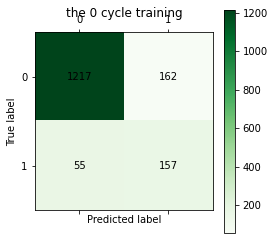

[[320  10]
 [ 32  36]]


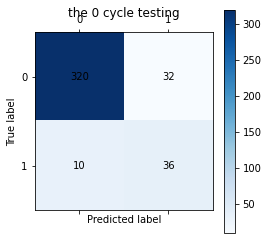

The 1 cycle accuracy of the LR for traning is: 72.59585166561911
The 1 cycle accuracy of the LR for testing is: 73.86934673366834
[[1236   52]
 [ 161  142]]


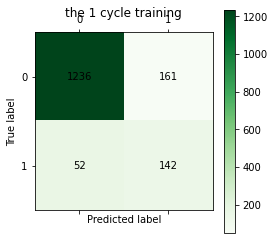

[[302  12]
 [ 43  41]]


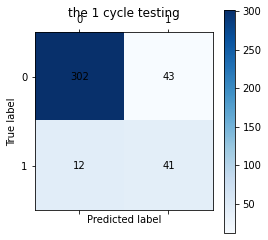

The 2 cycle accuracy of the LR for traning is: 72.1558768070396
The 2 cycle accuracy of the LR for testing is: 74.12060301507537
[[1212   52]
 [ 158  169]]


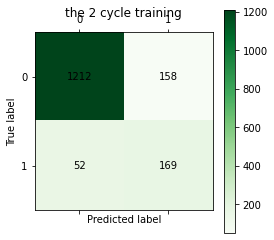

[[318  20]
 [ 32  28]]


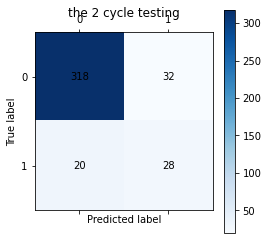

The 3 cycle accuracy of the LR for traning is: 72.78441231929604
The 3 cycle accuracy of the LR for testing is: 76.88442211055276
[[1235   50]
 [ 163  143]]


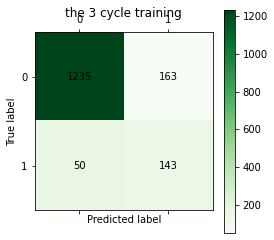

[[313   4]
 [ 42  39]]


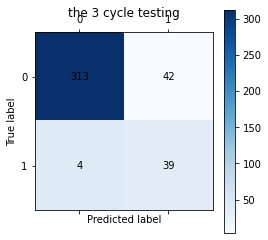

The 4 cycle accuracy of the LR for traning is: 71.84160905091139
The 4 cycle accuracy of the LR for testing is: 76.38190954773869
[[1229   50]
 [ 162  150]]


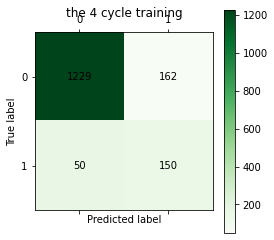

[[314   9]
 [ 37  38]]


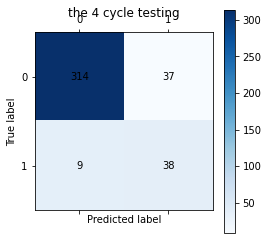

The 5 cycle accuracy of the LR for traning is: 72.59585166561911
The 5 cycle accuracy of the LR for testing is: 70.60301507537689
[[1236   49]
 [ 163  143]]


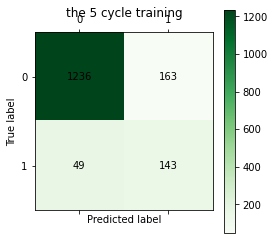

[[305  12]
 [ 33  48]]


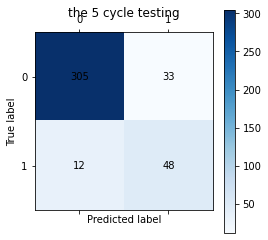

The 6 cycle accuracy of the LR for traning is: 72.59585166561911
The 6 cycle accuracy of the LR for testing is: 75.12562814070351
[[1240   49]
 [ 157  145]]


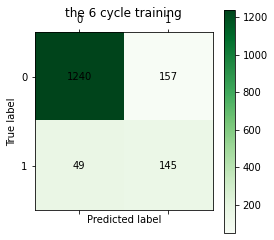

[[298  15]
 [ 44  41]]


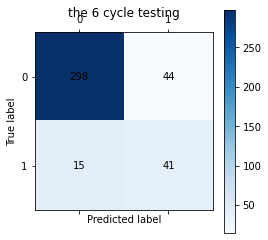

The 7 cycle accuracy of the LR for traning is: 71.15021998742928
The 7 cycle accuracy of the LR for testing is: 75.87939698492463
[[1217   51]
 [ 165  158]]


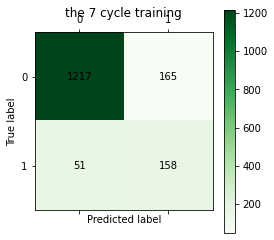

[[321  13]
 [ 32  32]]


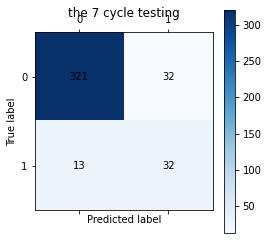

The 8 cycle accuracy of the LR for traning is: 69.70458830923947
The 8 cycle accuracy of the LR for testing is: 72.61306532663316
[[1220   57]
 [ 151  163]]


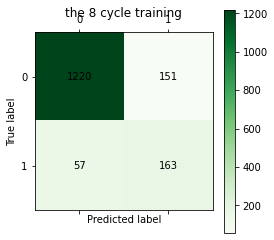

[[305  20]
 [ 39  34]]


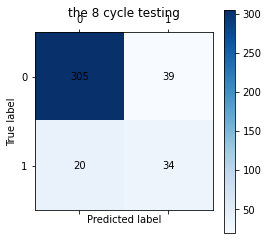

The 9 cycle accuracy of the LR for traning is: 85.85795097423005
The 9 cycle accuracy of the LR for testing is: 90.95477386934674
[[1215   56]
 [ 169  151]]


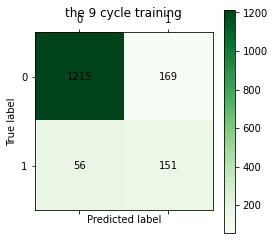

[[324   7]
 [ 29  38]]


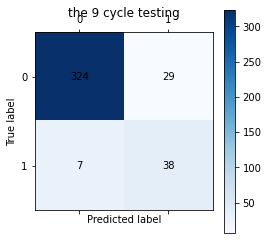

In [90]:
objects = training_loop()

In [91]:
import pickle

with open('model_LR_9th', 'wb') as files:
    pickle.dump(objects, files)

Load Model

In [93]:
with open('model_LR_9th' , 'rb') as f:
    model, x_train, y_train,x_test,y_test, score = pickle.load(f)

In [94]:
print('The accuracy of the Logistic Regression for Test Set is: {}'.format(score))

The accuracy of the Logistic Regression for Test Set is: 90.95477386934674


In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

[[1114  157]
 [ 277   43]]


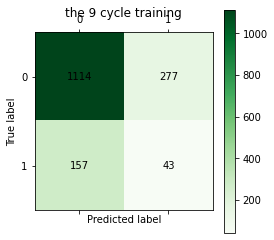

In [96]:
cm(y_train,train_predict,0,9)

[[287  44]
 [ 62   5]]


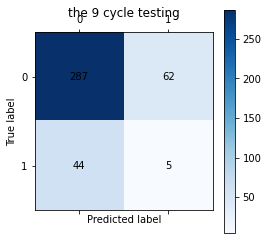

In [97]:
cm(y_test,test_predict,1,9)